In [1]:
import torch
import torchvision.transforms as transforms              
from torchvision.datasets import ImageFolder
import torchvision.models as models
from torchvision.models import Inception_V3_Weights
from torch.utils.data import DataLoader
import numpy as np
from torch.utils.data import Subset
from src.temperature_scaling import ModelWithTemperature
from src.imagenet_real import aps_imagenet_real_hist, raps_imagenet_real_hist, saps_imagenet_real_hist, aps_imagenet_real_scatter, raps_imagenet_real_scatter, saps_imagenet_real_scatter

# load pre-trained model InceptionV3 and set mode
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.inception_v3(weights=Inception_V3_Weights.IMAGENET1K_V1).to(device)

#  Reprocess: Center Crop and then resize to 299*299
data_transform = transforms.Compose([
    transforms.CenterCrop(299),
    transforms.Resize(299), 
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) 
])

sorted_val_path = "D:\\Download\\ImageNet-1K\\Validation_Set\\sorted_ImageNet_val"
dataset = ImageFolder(root=sorted_val_path, transform=data_transform)

# Temperature Scaling
model.eval() # only use output.logits of Inception's output
subset_size = len(dataset) // 10
indices = np.random.choice(len(dataset), subset_size, replace=False)
subset_dataset = Subset(dataset, indices)
train_loader = DataLoader(subset_dataset, batch_size=32, shuffle=False, num_workers=4)

model = ModelWithTemperature(model, temperature = 1.0).to(device)
model.set_temperature(train_loader)
model.eval()

# The number of times the experiment is going to be repeated
num_runs = 10

# error rate
alpha = 0.2

Before temperature - NLL: 1.058, ECE: 0.022
Optimal temperature: 0.962
After temperature - NLL: 1.046, ECE: 0.024


APS Classification on ImageNet Real (alpha=0.2), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.7947 ± 0.0020
Final Average Prediction Set Size: 15.31 ± 0.40
Final Average Coverage: 0.8008 ± 0.0037
Final Average Real Probability: 0.6846 ± 0.0038


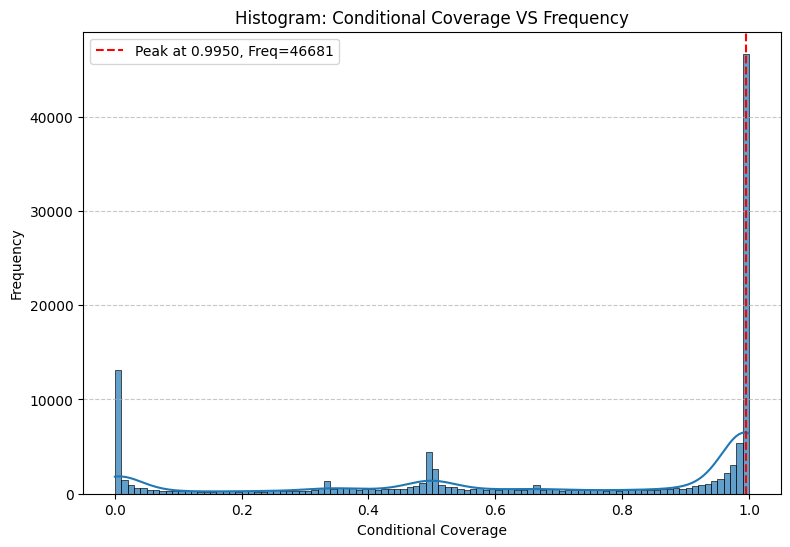

46681 (37.54%) samples reached the peak conditional coverage at 0.9950


In [2]:
aps_imagenet_real_hist(model, dataset, device, num_runs, alpha, is_ground_truth=False)

RAPS Classification on ImageNet Real (alpha=0.2), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.8128 ± 0.0021
Final Average Prediction Set Size: 2.97 ± 0.03
Final Average Coverage: 0.8008 ± 0.0036
Final Average Real Probability: 0.6611 ± 0.0033


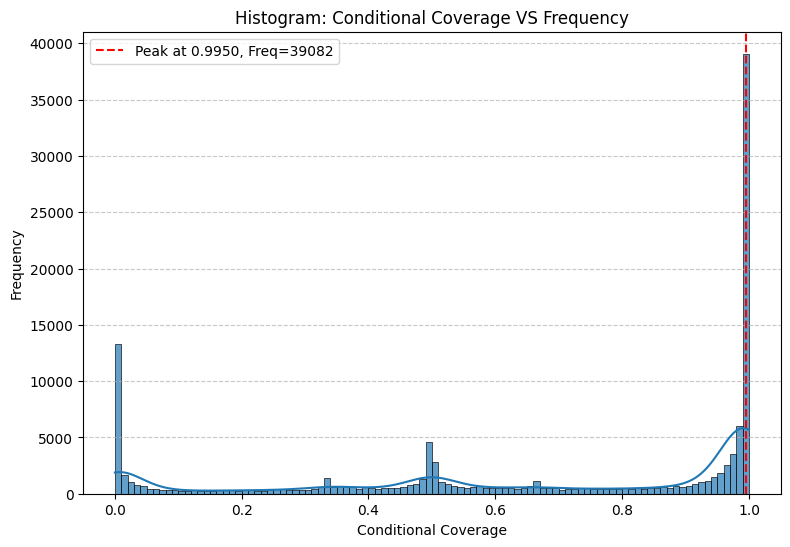

39082 (31.43%) samples reached the peak conditional coverage at 0.9950


In [3]:
raps_imagenet_real_hist(model, dataset, device, lambda_=0.05, k_reg=9, num_runs=10, alpha=0.2, is_ground_truth=False)

SAPS Classification on ImageNet Real (alpha=0.2), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.8545 ± 0.0030
Final Average Prediction Set Size: 1.62 ± 0.01
Final Average Coverage: 0.7994 ± 0.0036
Final Average Real Probability: 0.6102 ± 0.0030


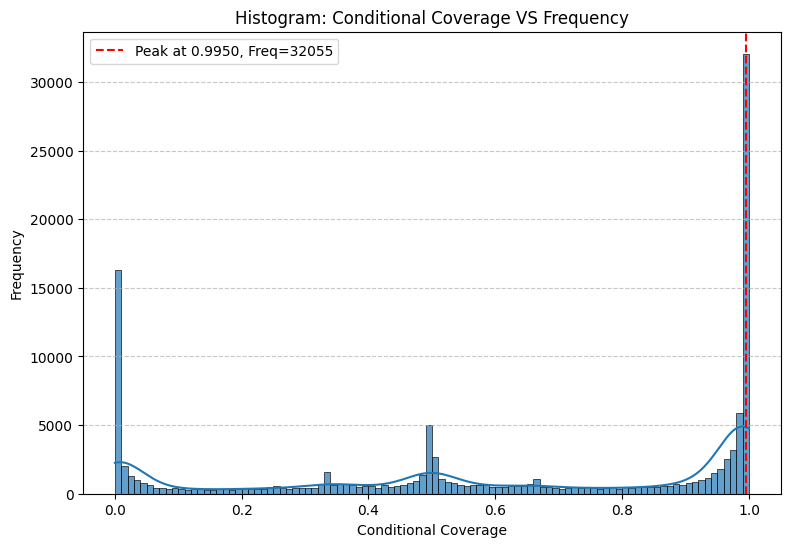

32055 (25.78%) samples reached the peak conditional coverage at 0.9950


In [4]:
saps_imagenet_real_hist(model, dataset, device, lambda_=0.2, num_runs=10, alpha=0.2, is_ground_truth=False)

APS Classification on ImageNet Real (alpha=0.2), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.7931 ± 0.0020
Final Average Prediction Set Size: 15.49 ± 0.41
Final Average Coverage: 0.8008 ± 0.0038
Final Average Real Probability: 0.6856 ± 0.0040


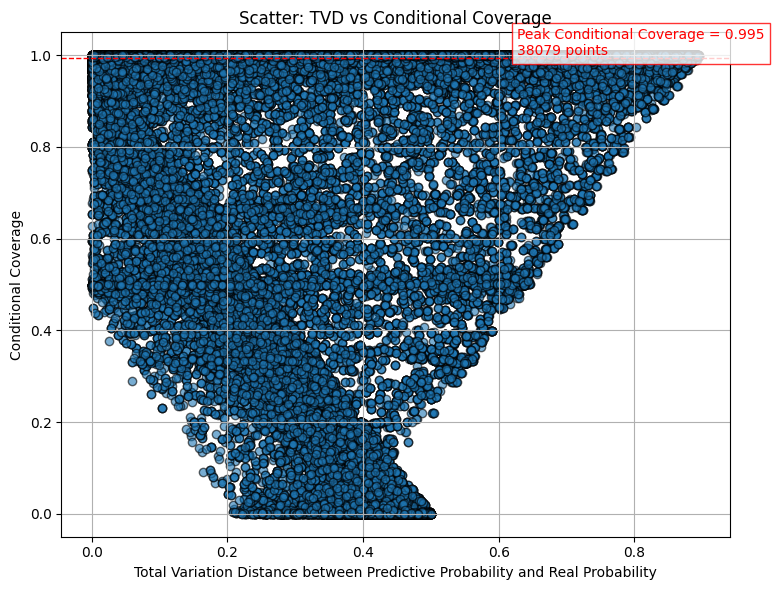

Peak Conditional Coverage = 0.995, with 38079 samples

=== Count Regions Summary ===
38328 (30.8%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
21754 (17.5%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
50127 (40.3%) samples in Count Region 3 [x:0-0.9, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.93959']
  Real Probability Set      : ['0.98548']
Sample 2:
  Predictive Probability Set: ['0.93405']
  Real Probability Set      : ['0.96225']
Sample 3:
  Predictive Probability Set: ['0.94752']
  Real Probability Set      : ['0.99049']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.71370', '0.04447', '0.04258']
  Real Probability Set      : ['0.00295', '0.00056', '0.00014']
Sample 2:
  Predictive Probability Set: ['0.96701']
  Real Probability Set      : ['0.01641']
Sample 3:
  Predictive Probability Set: ['0.78949']
  Real Probability Set      : ['0.00061

In [2]:
aps_imagenet_real_scatter(model, dataset, device, num_runs, alpha)

RAPS Classification on ImageNet Real (alpha=0.2), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.8112 ± 0.0021
Final Average Prediction Set Size: 2.98 ± 0.03
Final Average Coverage: 0.8009 ± 0.0036
Final Average Real Probability: 0.6620 ± 0.0034


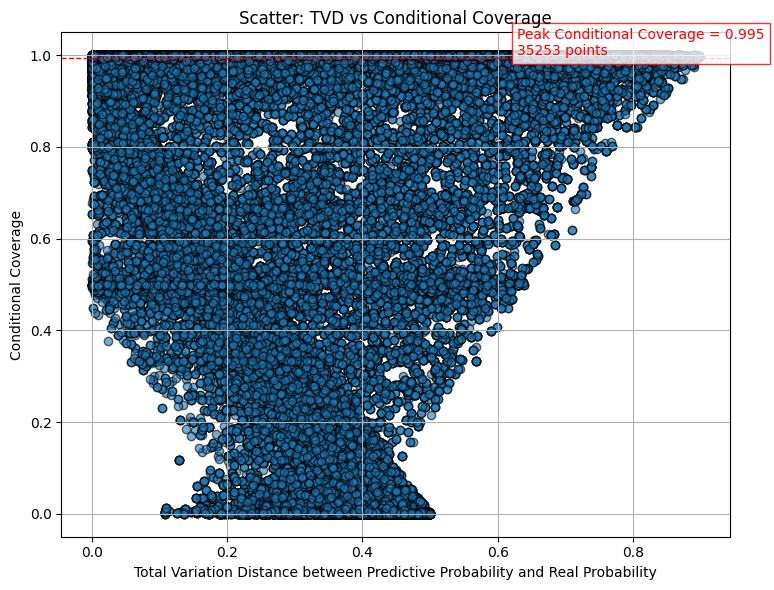

Peak Conditional Coverage = 0.995, with 35253 samples

=== Count Regions Summary ===
41826 (33.6%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
18422 (14.8%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
55675 (44.8%) samples in Count Region 3 [x:0-0.9, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.83004']
  Real Probability Set      : ['0.99894']
Sample 2:
  Predictive Probability Set: ['0.95948']
  Real Probability Set      : ['0.83929']
Sample 3:
  Predictive Probability Set: ['0.99955']
  Real Probability Set      : ['0.93444']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.95481']
  Real Probability Set      : ['0.17206']
Sample 2:
  Predictive Probability Set: ['0.49146', '0.08044', '0.03879', '0.03696', '0.02493', '0.00966', '0.00855', '0.00795', '0.00767', '0.00733']
  Real Probability Set      : ['0.00178', '0.00178', '0.00000', '0.00045', '0.

In [3]:
raps_imagenet_real_scatter(model, dataset, device, lambda_=0.05, k_reg=9, num_runs=10, alpha=0.2)

SAPS Classification on CIFAR10-H(alpha=0.2), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.8532 ± 0.0030
Final Average Prediction Set Size: 1.63 ± 0.01
Final Average Coverage: 0.7994 ± 0.0036
Final Average Real Probability: 0.6106 ± 0.0030


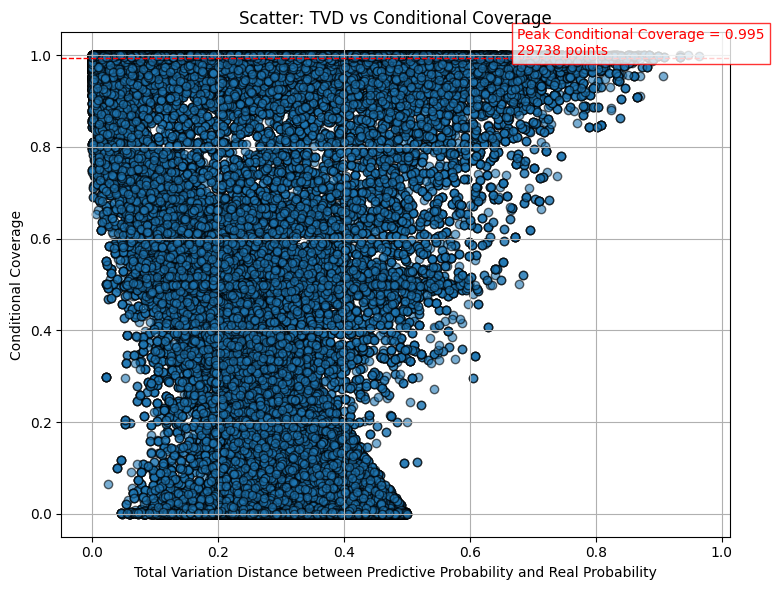

Peak Conditional Coverage = 0.995, with 29738 samples

=== Count Regions Summary ===
43861 (35.3%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
10657 (8.6%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
64999 (52.3%) samples in Count Region 3 [x:0-0.9, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.93613']
  Real Probability Set      : ['0.98493']
Sample 2:
  Predictive Probability Set: ['0.98488']
  Real Probability Set      : ['0.99900']
Sample 3:
  Predictive Probability Set: ['0.99465']
  Real Probability Set      : ['0.99288']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.95472']
  Real Probability Set      : ['0.03382']
Sample 2:
  Predictive Probability Set: ['0.93656']
  Real Probability Set      : ['0.00070']
Sample 3:
  Predictive Probability Set: ['0.68690', '0.04867']
  Real Probability Set      : ['0.00017', '0.00000']

--- Region 3: mediu

In [4]:
saps_imagenet_real_scatter(model, dataset, device, lambda_=0.2, num_runs=10, alpha=0.2)